# Exploration and Visualization of Data

### Why visualization?

Visualization is an essential method in any data scientist’s toolbox. Visualization is a key first step in the exploration of most data sets. As a general rule, you should never start creating models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly. Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Cleveland.jpg" alt="cover of Visualizing Data by William S. Cleveland" style="float:right; height: 160px;"><img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Tukey.jpg" alt="cover of Exploratory Data Analysis by John Tukey" style="float:left; height: 160px; margin-right: 10px;">The concepts of exploring a data set visually were pioneered by John Tukey in the 1960s and 1970s. Tukey consolidated his many ideas on data exploration into a book in the late 1970s, ***John Tukey, Exploratory Data Analysis, 1977, Addison-Westley***.

 Bill Cleveland documented his seminal work in visualization of complex data sets in his book, ***William S. Cleveland, Visualizing Data, 1993, Hobart Press***.

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relationships in the data set. Specifically using visualization when you approach a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships
- Use plot aesthetics to project multiple dimensions 
- Apply conditioning or faceting methods to project multiple dimensions




This notebook contains an introduction to the methods data scientists use to prepare and explore a data set. Data scientists spend a lot of time manipulating data to clean and prepare it (**data munging**) and to understand the relationships within the variables in the data (**data exploration**). Visualization is a key skill for any data scientist performing these tasks. 

Before performing any type of inference or machine learning on a data set, you should develop an understanding of the relationships in the data set. Skipping this step can lead to wasted time from unexpected problems when building models, or in constructing models with poor performance. When starting any data science project, it is a good idea to plan on spending considerable time exploring the data. These exploration steps are often performed in conjunction with data cleaning and preparing, as visualization often highlights problems with data.

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## About the data set

This data set is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

## Load and examine the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. The result is a Pandas data frame.

Execute the code in this cell to load the data into your notebook. **Make sure you are connected to the internet or that you have the .csv file in your working directory!**

In [4]:
def read_auto_data(file = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(file)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price


auto_price = read_auto_data()

Notice that there are some missing values in the numeric columns by the following steps:
1. A list of the columns with the missing values is created.
2. These data are coded by the `"?"` string. Each case where this string occurs is replaced by a numpy `nan`, a missing value. 
3. Then rows containing `nan` are removed from the data frame. 
4. The type of these columns is then coerced to numeric. 

Next, have a first look at the dimensions and data types of the column of the data frame.

In [5]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  engine-size        195 non

Some key things to notice here are:

- There are 195 rows or cases in the data set.
- The data set has 26 variables or columns.
- Columns have a type of either `object` (character), `float64` (floating point number), or `int64` (integer). 


### Summary statistics

You can also learn a lot about a data set by looking at statistical summaries. The Pandas `describe` method does just this. Execute the code in the cell below and note the result.

In [6]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Notice, that summary statistics are only provided for numeric columns. For these column this summary provides some useful information:

- The minimum and maximum values of each variable are displayed.
- The quantiles are shown; 25%, 50% (median), 75%. Note that, for several of these variables, the upper interquartile ranges (IQR) are different from the lower IQR, indicating the distributions are skewed. 
- The mean is displayed. Compare the mean and the median, noting that they are often quite different. Again this is a sign of a skewed distribution. 
- The standard deviation gives a measure of the dispersion of the values.

We can also obtain relevant summary statistics for categorical columns using the `include = 'object'`, which limits the columns to those of type `object`.

In [7]:
auto_price.describe(include = 'object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,195,195,195,195,195,195,195,195,195,195,195
unique,52,21,2,2,3,5,3,2,5,6,7
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,35,32,175,159,112,94,116,192,143,155,89


### Examine the data frames

Next, let's look at the first and last few lines of the data frame using the `head` and `tail` methods. Execute the code in the cells below to examine the first 10 rows and last 5 rows (the default) of the data frame, using the `head` and `tail` methods.

In [8]:
auto_price.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
auto_price.tail(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Exercise

Say we wanted to examine the `length` column in the data. We already saw that we can use `describe`.

In [10]:
auto_price[['length']].describe()

,length
count,195.000000
mean,174.256923
std,12.476443
min,141.100000
25%,166.300000
50%,173.200000
75%,184.050000
max,208.100000


Using the `seaborn` library, we can plot a line plot of `length` against the index of the data `auto_price.index`:

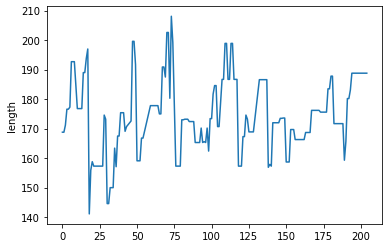

In [11]:
sns.lineplot(x = auto_price.index, y = 'length', data = auto_price);

Do you find the above visualization useful? When can it be useful and when not?

Now sort the data by `length` and reset the index of the data, then recreate the above plot. Do you find the new plot useful?

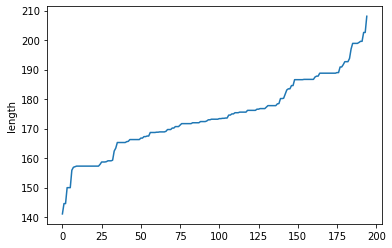

In [14]:
auto_price = auto_price.sort_values(by=['length'])
auto_price = auto_price.reset_index(drop=True)
sns.lineplot(x = auto_price.index, y = 'length', data = auto_price);

Run `auto_price['length'].nlargest(10)` to show the top 10 values for `length`. Can you show these values on the plot above?

In [15]:
auto_price['length'].nlargest(10)

194    208.1
192    202.6
193    202.6
190    199.6
191    199.6
189    199.2
185    198.9
186    198.9
187    198.9
188    198.9
Name: length, dtype: float64

If the data is really big, instead of plotting `length` itself, we can use the `quantile` method to obtain percentiles for `length` and plot those instead. Use `quantile` to obtain the 0th, 1st, 2nd, 3rd, ..., 100th percentile for `length` and plot the percentiles. HINT: Use `np.arange(0, 1.01, 0.01)` to get the percentiles all at once.

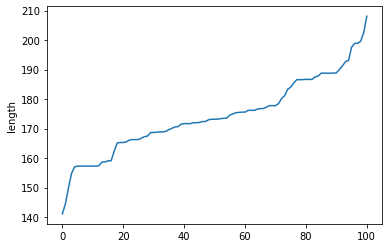

In [31]:
auto_price_quantiles = pd.DataFrame(auto_price['length'].quantile(q=np.arange(0, 1.01, 0.01)))
auto_price_quantiles.head()
sns.lineplot(x = auto_price_quantiles.index * 100, y = 'length', data = auto_price_quantiles );

Do the results look similar to what we saw earlier?

### End of exercise

## Frequency tables

The summary techniques we have used so far are suitable only for numeric variables. Categorical variables have values which are typically unordered. Therefore, we need a method to summarize categorical based on counts.  

The `groupby` method lets you subset a data frame by a list of columns. The data are grouped into a hierarchy by the order of the columns specified. Notice that the `groupby` operation only makes sense for categorical variables. 

The `agg` or aggregation method can be used to compute summary statistics. In this case, we will use the `count` operator. The frequency table shows the count of each category of the variable. 

Execute the following code to show the number of cars in the data set by unique manufacturer.

In [32]:
auto_price.groupby(['make']).agg('count')[['length']]

,length
make,
alfa-romero,3
audi,6
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,2
jaguar,3
mazda,13


Notice how some manufacturers like alfa-romero and chevrolet have only three cars types in the sample. Toyota has the most cars in this sample. 

Or, you can look at the frequency of a combination of two categorical variables. The groups are organized by the order of the columns specified. Execute the code in the cell below and examine the results:

In [100]:
auto_price.groupby(['make', 'fuel-type']).agg('count')[['length']]

,,length
make,fuel-type,
alfa-romero,gas,3
audi,gas,6
bmw,gas,8
chevrolet,gas,3
dodge,gas,9
honda,gas,13
isuzu,gas,2
jaguar,gas,3
mazda,diesel,2


Examine this result. The data are grouped first by `make` and then by engine `fuel-type`. This table gives us a feel for which manufactures only make gas cars and which ones make both gas and diesel cars, and how many of each. Notice that groups with counts of zero do not display in the table. 

Frequency tables with multiple levels of grouping can be easily displayed
. Execute the code in the cell below and examine the result. 

In [19]:
auto_price.groupby(['make', 'fuel-type', 'aspiration']).agg('count')[['length']]

length
make          fuel-type aspiration        
alfa-romero   gas       std              3
audi          gas       std              5
                        turbo            1
bmw           gas       std              8
chevrolet     gas       std              3
dodge         gas       std              6
                        turbo            3
honda         gas       std             13
isuzu         gas       std              2
jaguar        gas       std              3
mazda         diesel    std              2
              gas       std             11
mercedes-benz diesel    turbo            4
              gas       std              4
mercury       gas       turbo            1
mitsubishi    gas       std              7
                        turbo            6
nissan        diesel    std              1
              gas       std             16
                        turbo            1
peugot        diesel    turbo            5
              gas       std              5
                        turbo            1
plymouth      gas       std              5
                        turbo            2
porsche       gas       std              4
saab          gas       std              4
                        turbo            2
subaru        gas       std             10
                        turbo            2
toyota        diesel    std              2
                        turbo            1
              gas       std             29
volkswagen    diesel    std              2
                        turbo            2
              gas       std              8
volvo         diesel    turbo            1
              gas       std              6
                        turbo            4

Notice that with three levels the table takes a bit more effort to examine. As the number of grouping levels increases, frequency tables become progressively more difficult to understand. 

### Exercise

In the cell below, create and execute the code to create a frequency table of autos by body style and number of doors.

In [33]:
#auto_price.dtypes
auto_price.groupby(['body-style', 'num-of-doors']).agg('count')[['length']].unstack()

length            
num-of-doors      ?  four   two
body-style                     
convertible     NaN   NaN   6.0
hardtop         NaN   NaN   8.0
hatchback       NaN  10.0  53.0
sedan           2.0  78.0  14.0
wagon           NaN  24.0   NaN

- Which body style and door configuration is the most frequent?
- Ignoring missing values, which body style and door configuration is the least frequent?
- What happens to the results if we add the `unstack()` method to the end?
- Create the same frequency table using `pd.crosstabs` instead. What is the advantage of using `pd.crosstabs`? What is the `normalize` argument used for?

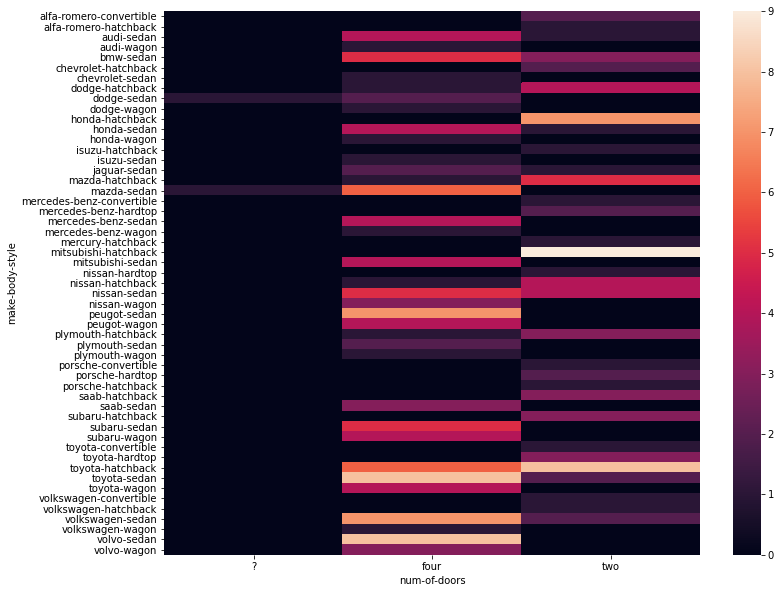

In [45]:
count_cols = pd.crosstab([auto_price['make'], auto_price['body-style']] , auto_price['num-of-doors'])
plt.figure(figsize=(12,10))
sns.heatmap(count_cols)
# normalize expresses the count of each category as a ratio of the totals.


### End of exercise

### The confusing world of Python graphics libraries. 

There are a number of powerful charting packages available for the Python language. This situation can lead to confusion as to which package to use for which situation. Below is an outline to help you understand the organization of Python graphics choices:
https://bokeh.pydata.org/en/latest/
- **Matplotlib:** [Matplotlib](https://matplotlib.org/users/index.html) is a low-level scientific and technical charting package. A number of other Python charting libraries are built on top of Matplotlib. As a result, a bit of knowledge of Matplotlib will help you set the attributes of plots created with several other packages. An extensive [tutorial](https://matplotlib.org/tutorials/index.html) is available for Matplotlib.
- **Pandas plotting:** The [visualization methods for Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html) provides a simple interface for common plot types for data in data frames. As with many other Python plotting libraries Pandas visualization is built on top of Matplotlib. You can use common Matplotlib methods with Pandas visualization. 
- **Seaborn:** The [Seaborn](https://seaborn.pydata.org/) package provides high-level api for statistical graphics. As with many other Python plotting libraries Seaborn is built on top of Matplotlib. You can use common Matplotlib methods with Seaborn.  A [tutorial](https://seaborn.pydata.org/tutorial.html) with useful examples is available for Seaborn.   
- **Other packages:** There are a number of other sophisticated and useful Python graphics packages. Unfortunately, we do not have time in this course to cover these packages. The Python [ggplot](http://ggplot.yhathq.com/) package provides a high-level graphics interface based on the grammar of graphics used in the R ggplot2 package.  There are two powerful Python interactive graphics packages which are widely used, [plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/).

### Basic chart types

Now that you have loaded and had a first look at the data, it's time to get to work making some charts.   

There are enumerable chart types that are used for data exploration. When exploring a data set you need to examine multiple views. This process will require using multiple chart types. 

All computer data graphics are projected onto a 2-dimensional surface.  This is a fundamental restriction on data visualization we must learn to work with. Very broadly, plots are one-dimensional (univariate) or 2-dimensional (bi-variate). We will study plots of both types in this lesson.   

In this lesson you will work with a number of common chart types. The list below indicates the plots we will explore and an indication about the dimensionality of the plot:

- **Bar plots** - 1d
- **Histograms** - 1d
- **Box plots** - 1d +
- **Kernel Density Estimation Plots** - 1d +
- **Violin plots** -1d +
- **Scatter plot** - 2d
- **2d Kernel Density Plots** -2d
- **Hexbin plots** - 2d
- **Line plots** - 2d

The following exercises give you some practice using these chart types. 

### Bar plots

To start our exploration of these data we will work with bar plots. Bar plots are used to display the counts or frequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable.

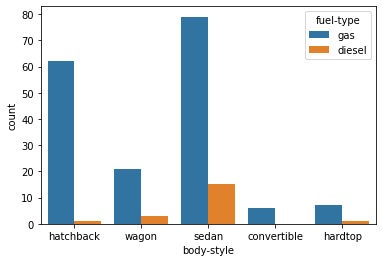

In [51]:
sns.countplot(x = 'body-style', hue = 'fuel-type', data = auto_price);

From this display you can see that the most frequent body type is sedan and the least frequent is convertible, and diesels make up a small percentage of cars overall.

### Exercise

It would be easier to understand this plot if the frequencies of the categories were ordered. This would be particularly true if there were a large number of categories or categories with similar counts. Use the `value_counts()` method to get a list where each `body-style` is ordered by frequency, then use the `order` argument in `countplot` to reorder the data.

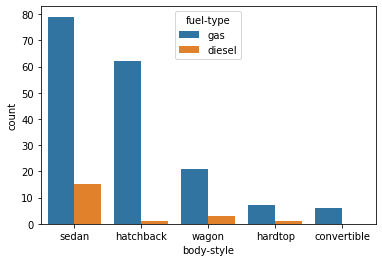

In [52]:
sns.countplot(x = 'body-style', hue = 'fuel-type', 
              data = auto_price, order = auto_price['body-style'].value_counts().index);

- Is there evidence of missing values in any particular combinations?
- Confirm this by querying the data.

In [58]:
auto_price.groupby(['body-style', 'fuel-type']).agg('count')[['length']]
# there's only gas convertibles

length
body-style  fuel-type        
convertible gas             6
hardtop     diesel          1
            gas             7
hatchback   diesel          1
            gas            62
sedan       diesel         15
            gas            79
wagon       diesel          3
            gas            21

### End of exercise

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values in each bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

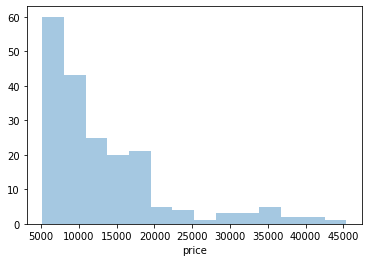

In [178]:
sns.distplot(auto_price['price'], kde = False);

The histogram shows that the price of automobiles are skewed toward the lower end, with only a few high-priced autos.

### Box plots

Box plots, also known as box and whisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

A diagram showing the interpretation of a box plot is shown in the figure below.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/BoxPlot.png" alt="box plot with interquartile ranges">

At first glance the interpretation of a box plot is a bit intimidating. The box plot is read in the following manner:

1. The bold line in the box shows the median of the distribution. 
2. The upper and lower middle quartiles of the distribution define the upper and lower limits of the box.
3. The length of the whiskers is the lesser of +/-1.5 times the inter-quartile range (about 2.7 times the standard deviation) or the most extreme values of the data. 
4. Outliers are shown by symbols, such as `+` or `*`, beyond the whiskers.

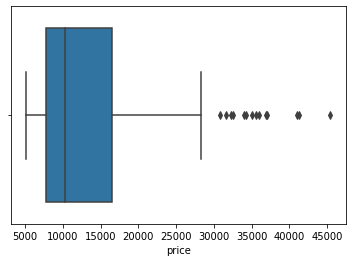

In [59]:
ax = sns.boxplot(x = 'price', data = auto_price);

Compare the above plot to the histogram of price. You can see from both plots that the distribution of price is quite asymmetric. Further, there are a significant number of high-priced cars that appear as outliers. 

The above plot is quite basic. Most importantly, this plot lacks the annotation required for someone to quickly understand it. At the minimum a title and an axis label are required. Fortunately, adding these attributes to the plot is relatively easy, since matplotlib provides methods to do so. 

There is another issue with this plot. Notice that the limits of the x axis does not include `0`, which can distort the observer's view of the data. This is particularly the case when making comparisons between variables, of subsets of variables.

### Exercise

In the cell below create and execute the code to display a box plot of auto price grouped by both `fuel-type` and `aspiration`.

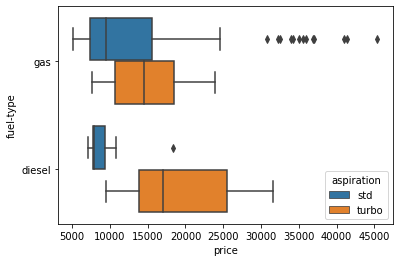

In [60]:
ax = sns.boxplot(x = 'price', y = 'fuel-type', hue = 'aspiration', data = auto_price);

- Are turbo diesel cars generally more expensive that standard gas and diesel cars, and why? 
- Which type of car shows the greatest price range and the most outliers? 

### Kernel density estimation plots

You have used two methods for visualizing distributions. Now, you will look at another method, kernel density estimation. Kernel density estimation uses a moving window density estimation kernel to average the density of the distribution. The result is a smoothed estimate of the probability density of the variable.

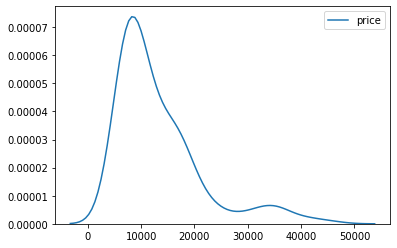

In [180]:
sns.kdeplot(auto_price['price']);

Examine this plot. Notice that the distribution is heavily skewed to the low side with a long right tail. This is called a right-skewed distribution. This finding is consistent with the other displays you have created with histograms and box plots.

A **left-skewed distribution** has a long left tail. Left-skewed distribustions are also called *negatively-skewed* distributions. That is due to a long tail in the negative (or low) direction on the number line. The mean is left of the peak. Typically mean is left of median.

A **right-skewed distribution** has a long right tail. Left-skewed distribustions are also called *positively-skewed* distributions. That is due to a long tail in the positive (or high) direction on the number line. The mean is right of the peak. Typically mean is right of median.

The KDE can also be super-imposed on top of the histogram, since the two capture very similar information (albeit using different methods).

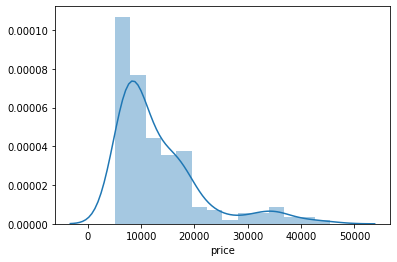

In [181]:
sns.distplot(auto_price['price'], kde = True);

### Violin plots

Violin plots are a useful, and relatively new, plot type. The violin plot combines some attributes of a kernel density plot and the box plot. The violin plot shows a pair of symmetric kernel density plots. The violin plot has the advantage, and perhaps disadvantage, of showing more. Like a box plot, the violin plot can be conditioned on a categorical (factor) variable, so distributions of a grouped variable can be compared.

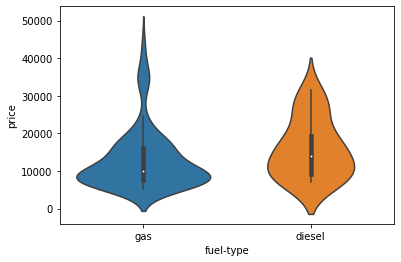

In [183]:
sns.violinplot(x = 'fuel-type', y = 'price', data = auto_price);

Examine this plot and  notice the following:
1. The price of gas and diesel cars overlap quite a lot. 
2. The outliers of price for gas cars are clearly visible.
3. The median (white dot), inner quartiles (black box), and whiskers at +/-1.5 of the IQR are all visible inside the violin. 

### Exercise

In the cell below create and execute the code to display a violin of auto price grouped by `fuel-type` and `aspiration`. Seaborn allows you to group by the `x` variable and by `hue` (color). In this case, use the arguments `x = 'fuel-type'` and `hue = 'aspiration'`. You should also try the alternative display option, `split = True`, which shows split violin plots.  

In [ ]:
sns.violinplot(x = 'fuel-type', y = 'price', hue = 'aspiration', data = auto_price);

In [ ]:
sns.violinplot(x = 'fuel-type', y = 'price', hue = 'aspiration', data = auto_price, split = True);

In [ ]:
pd.crosstab(auto_price['num-of-doors'], auto_price['body-style'])
#auto_price.dtypes

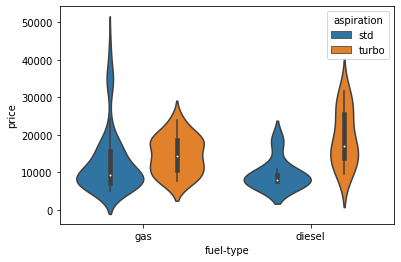

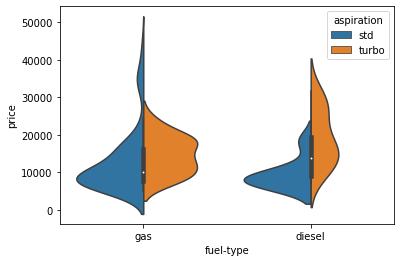

In [64]:
sns.violinplot(x = 'fuel-type', y = 'price', hue = 'aspiration', data = auto_price, split = True);

In [67]:
pd.crosstab(auto_price['num-of-doors'], auto_price['body-style'])
#auto_price.dtypes

body-style,convertible,hardtop,hatchback,sedan,wagon
num-of-doors,,,,,
?,0,0,0,2,0
four,0,0,10,78,24
two,6,8,53,14,0


- Which category of autos has the smallest range of prices?
- Are turbo diesel cars generally more expensive and why?

### End of exercise